In [1]:
import requests
import pandas as pd

import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, io, filters, color, exposure


from numpy import array
import pickle  

import keras
##from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
##import tensorflow as tf

from pandas_ml import ConfusionMatrix

Using TensorFlow backend.


In [2]:
import sklearn

In [3]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7C0D-FBBE

 Directory of C:\Users\taras\Desktop\histolines\data\general image

2019-11-17  06:35 PM            55,886  iphone vs android image classifier.ipynb
2019-11-17  06:33 PM           241,466  iphone vs android_ image reader.ipynb
2019-11-17  06:37 PM    <DIR>          .
2019-11-17  06:37 PM    <DIR>          ..
2019-11-17  06:37 PM    <DIR>          .ipynb_checkpoints
2019-11-17  06:25 PM    <DIR>          data
2019-11-17  06:13 PM           181,424 image classifier.ipynb
2019-11-17  11:55 AM           310,566 image reader.ipynb
2019-11-17  05:10 PM           337,485 image reader_general.ipynb
2019-11-17  05:48 PM           294,801 image reader_general_concice.ipynb
2019-11-17  06:32 PM       105,617,912 image_dataframe.pkl
               7 File(s)    107,039,540 bytes
               4 Dir(s)  511,950,991,360 bytes free


In [4]:

pkl_file = open('image_dataframe.pkl', 'rb')  
data= pickle.load(pkl_file)
pkl_file.close()  


In [5]:
data.head()

,image_path,cat,images_data
0,C:/Users/taras/Desktop/histolines/data/general...,galaxy s9,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,C:/Users/taras/Desktop/histolines/data/general...,galaxy s9,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,C:/Users/taras/Desktop/histolines/data/general...,galaxy s9,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,C:/Users/taras/Desktop/histolines/data/general...,galaxy s9,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,C:/Users/taras/Desktop/histolines/data/general...,galaxy s9,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [6]:
all_image_gray=[]
for image in data['images_data']:
    all_image_gray.append(color.rgb2gray(image))
all_images_gray_array=array(all_image_gray)   
all_images_gray_array.shape



(879, 200, 200)

In [7]:
all_images_gray_array.shape


(879, 200, 200)

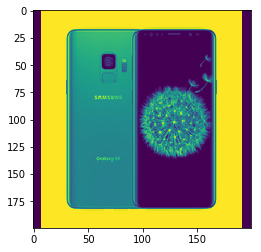

In [8]:
plt.imshow((all_images_gray_array[1]))

In [9]:
file_names_array=array(data['cat']) 
pd.value_counts(pd.Series(file_names_array))

iphone11     462
galaxy s9    417
dtype: int64

In [10]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
file_names_array_cat= encoder.fit_transform(file_names_array)

##print(file_names_array_cat)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images_gray_array, file_names_array, test_size=0.3)


In [12]:
img_rows, img_cols = 200, 200
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
##x_train /= 255
##x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (615, 200, 200, 1)
615 train samples
264 test samples


In [13]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train= encoder.fit_transform(y_train)
y_train=np.hstack((y_train, 1 - y_train))
y_test= encoder.fit_transform(y_test)
y_test=np.hstack((y_test, 1 - y_test))
##print(y_train)

In [14]:
x_train_rot=[]
y_train_rot=[]
for i in range(len(x_train)):
    x_train_rot.append(x_train[i])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i][::-1,:,:])
    y_train_rot.append(y_train[i])
    
    x_train_rot.append(x_train[i][:,::-1,:])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i].transpose([1,0,2]))
    y_train_rot.append(y_train[i])
x_train_rot = np.array(x_train_rot,dtype='float32')
y_train_rot = np.array(y_train_rot,dtype='float32')
len(x_train_rot)

2460

In [15]:

from pandas_ml import ConfusionMatrix
def model_eval():
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append(1)
        if ((y_test[i][1])==1):
            y_test_list.append(2)

    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test_list,predicted_classes)
    ### got from https://pandas-ml.readthedocs.io/en/latest/conf_mat.html

    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append("no")
        if ((y_test[i][1])==1):
            y_test_list.append("yes")


    ##from sklearn.metrics import confusion_matrix
    ##confusion_matrix(y_test_list,predicted_classes)
    predicted_classes_list=[]
    for label in predicted_classes:

        if (label==0):
            predicted_classes_list.append("no")
        if (label==1):
            predicted_classes_list.append("yes")

    confusion_matrix = ConfusionMatrix(y_test_list,predicted_classes_list)
    print("Confusion matrix:\n%s" % confusion_matrix)
    ##confusion_matrix.plot()
    ##confusion_matrix.print_stats()

In [16]:
# Training the model

In [17]:
batch_size =10
##batch_size = 5
num_classes = 2
##epochs = 10
epochs =20


model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(4, 4),activation='relu'))

model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(8, 8), activation='relu'))

model.add(Dropout(0.25))


model.add(Conv2D(32, kernel_size=(32, 32),  activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))






model.add(Flatten())
model.add(Dense(28, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='sigmoid'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 32)        65568     
_________________________________________________________________
dropout_2 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        1048608   
__________

Train on 2460 samples, validate on 264 samples
Epoch 1/20
2460/2460 [==============================] - 77s 31ms/step - loss: 0.6939 - acc: 0.5815 - val_loss: 0.6521 - val_acc: 0.6136
Epoch 2/20
2460/2460 [==============================] - 63s 26ms/step - loss: 0.6354 - acc: 0.6583 - val_loss: 0.6256 - val_acc: 0.6553
Epoch 3/20
2460/2460 [==============================] - 63s 26ms/step - loss: 0.6096 - acc: 0.6852 - val_loss: 0.6038 - val_acc: 0.6856
Epoch 4/20
2460/2460 [==============================] - 63s 26ms/step - loss: 0.5687 - acc: 0.7033 - val_loss: 0.6274 - val_acc: 0.6761
Epoch 5/20
2460/2460 [==============================] - 63s 26ms/step - loss: 0.5107 - acc: 0.7439 - val_loss: 0.5672 - val_acc: 0.7273
Epoch 6/20
2460/2460 [==============================] - 63s 26ms/step - loss: 0.4510 - acc: 0.7945 - val_loss: 0.6255 - val_acc: 0.7481
Epoch 7/20
2460/2460 [==============================] - 63s 26ms/step - loss: 0.3804 - acc: 0.8335 - val_loss: 0.5872 - val_acc: 0.7708
E

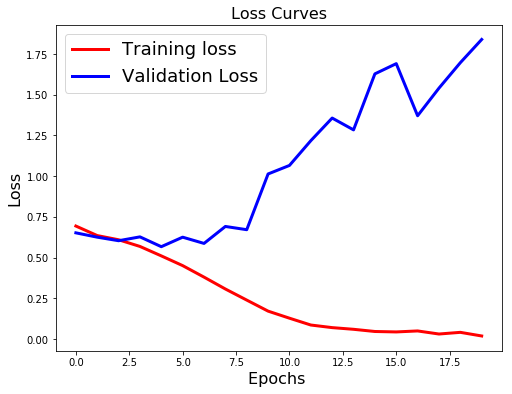

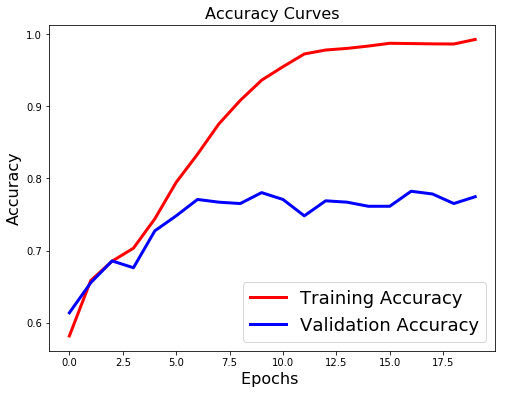

In [18]:


history = model.fit(x_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
model_eval()